# Explores fitting the epidemics model SIR to the spread of memes

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [30]:
# The SIR model in differential form
def model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solves the model based on beta and gamma
def model_func(x, N, beta, gamma):
    R0 = 0
    I0 = 1
    S0 = N - I0 - R0
    y0 = S0, I0, R0
    ret = odeint(model, y0, x, args=(N, beta, gamma))
    S, I, R = ret.T
    return I

def make_plot(title, df):
    days = df.index.values
    t = np.linspace(0,days[-1], 10000)
    popt, pcov = curve_fit(model_func, days, df['Interest'].values)
    plt.plot(t, model_func(t, *popt), 'r-', label='SIR model')
    plt.plot(days, df['Interest'].values, 'b.', label='Data')
    plt.title("Meme: " + title)
    plt.ylabel("Interest")
    plt.xlabel("Days")
    plt.legend()
    plt.show()
    return popt, pcov

Area 51 meme starting: 2019-07-08

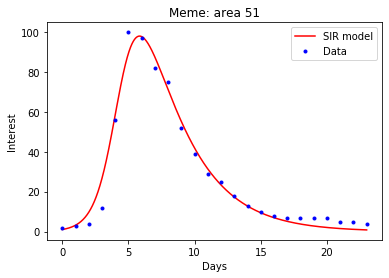

In [31]:
area51 = pd.read_csv("data/area_51.csv")
popt, pcov = make_plot("area 51", area51)

In [5]:
print(f"Optimized parameters: {popt}")
print(f"Error: {np.sqrt(np.diag(pcov))}")

Optimized parameters: [217.50225763   1.49137276   0.32515021]
Error: [17.80960644  0.02584409  0.03121192]


OK Boomer meme starting: 2019-10-25

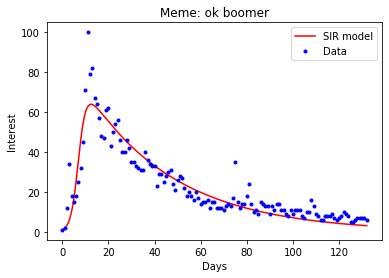

In [6]:
boomer = pd.read_csv("data/ok_boomer.csv")
popt, pcov = make_plot("ok boomer", boomer)

In [7]:
print(f"Optimized parameters: {popt}")
print(f"Error: {np.sqrt(np.diag(pcov))}")

Optimized parameters: [7.69113543e+01 6.37938098e-01 2.56915977e-02]
Error: [2.61689676e+00 2.66116291e-02 1.25295371e-03]


Baby Yoda meme starting: 2019-11-11

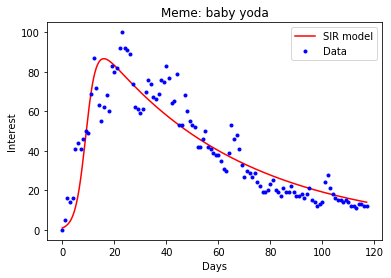

In [8]:
yoda = pd.read_csv("data/yoda.csv")
popt, pcov = make_plot("baby yoda", yoda)

In [9]:
print(f"Optimized parameters: {popt}")
print(f"Error: {np.sqrt(np.diag(pcov))}")

Optimized parameters: [1.02263867e+02 5.23216669e-01 1.84573607e-02]
Error: [3.49700781e+00 2.08765063e-02 1.00606617e-03]


Surprised Pikachu meme starting: 2018-10-28

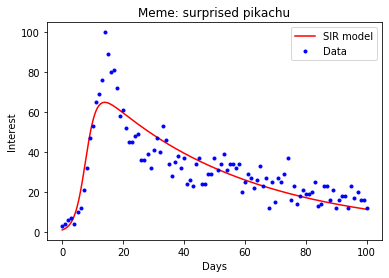

In [10]:
pikachu = pd.read_csv("data/pikachu.csv")
popt, pcov = make_plot("surprised pikachu", pikachu)

In [11]:
print(f"Optimized parameters: {popt}")
print(f"Error: {np.sqrt(np.diag(pcov))}")

Optimized parameters: [7.68227004e+01 5.77496562e-01 2.07922118e-02]
Error: [3.14593262e+00 2.87149512e-02 1.37446003e-03]


Me and the boys meme starting: 2019-05-30

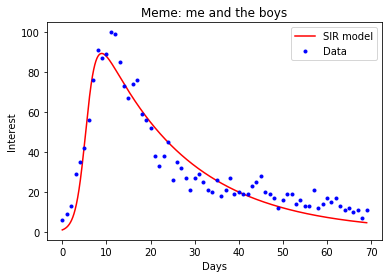

In [12]:
boys = pd.read_csv("data/the_boys.csv")
popt, pcov = make_plot("me and the boys", boys)

In [13]:
print(f"Optimized parameters: {popt}")
print(f"Error: {np.sqrt(np.diag(pcov))}")

Optimized parameters: [1.13801487e+02 9.16254805e-01 5.05751831e-02]
Error: [4.40393239e+00 3.25523323e-02 2.78937294e-03]


Yelling at a cat meme starting: 2019-10-24

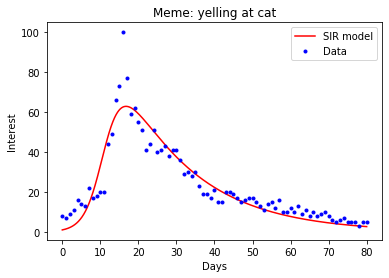

In [15]:
cat = pd.read_csv("data/yelling_cat.csv")
popt, pcov = make_plot("yelling at cat", cat)